Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
Data=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
Data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
Data1=pd.read_excel("EastWestAirlines.xlsx")
Data1

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
Data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
Cluster_Data=Data.iloc[:,1:]
Cluster_Data.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


Hierarchical Clustering

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
fig=px.scatter_matrix(Cluster_Data,width=1200,height=1600)
fig.show()

In [10]:
fig2=px.scatter_3d(Cluster_Data,x='Balance',
                   y='Bonus_miles',z='Flight_miles_12mo',color='Award?',size='Days_since_enroll')
fig2.update_layout(title='5 D representation')
fig2.show()

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

In [12]:
#SCALING THE DATA
scale=RobustScaler()
Final_Data=Cluster_Data.copy()
scaled_data=scale.fit_transform(Final_Data)

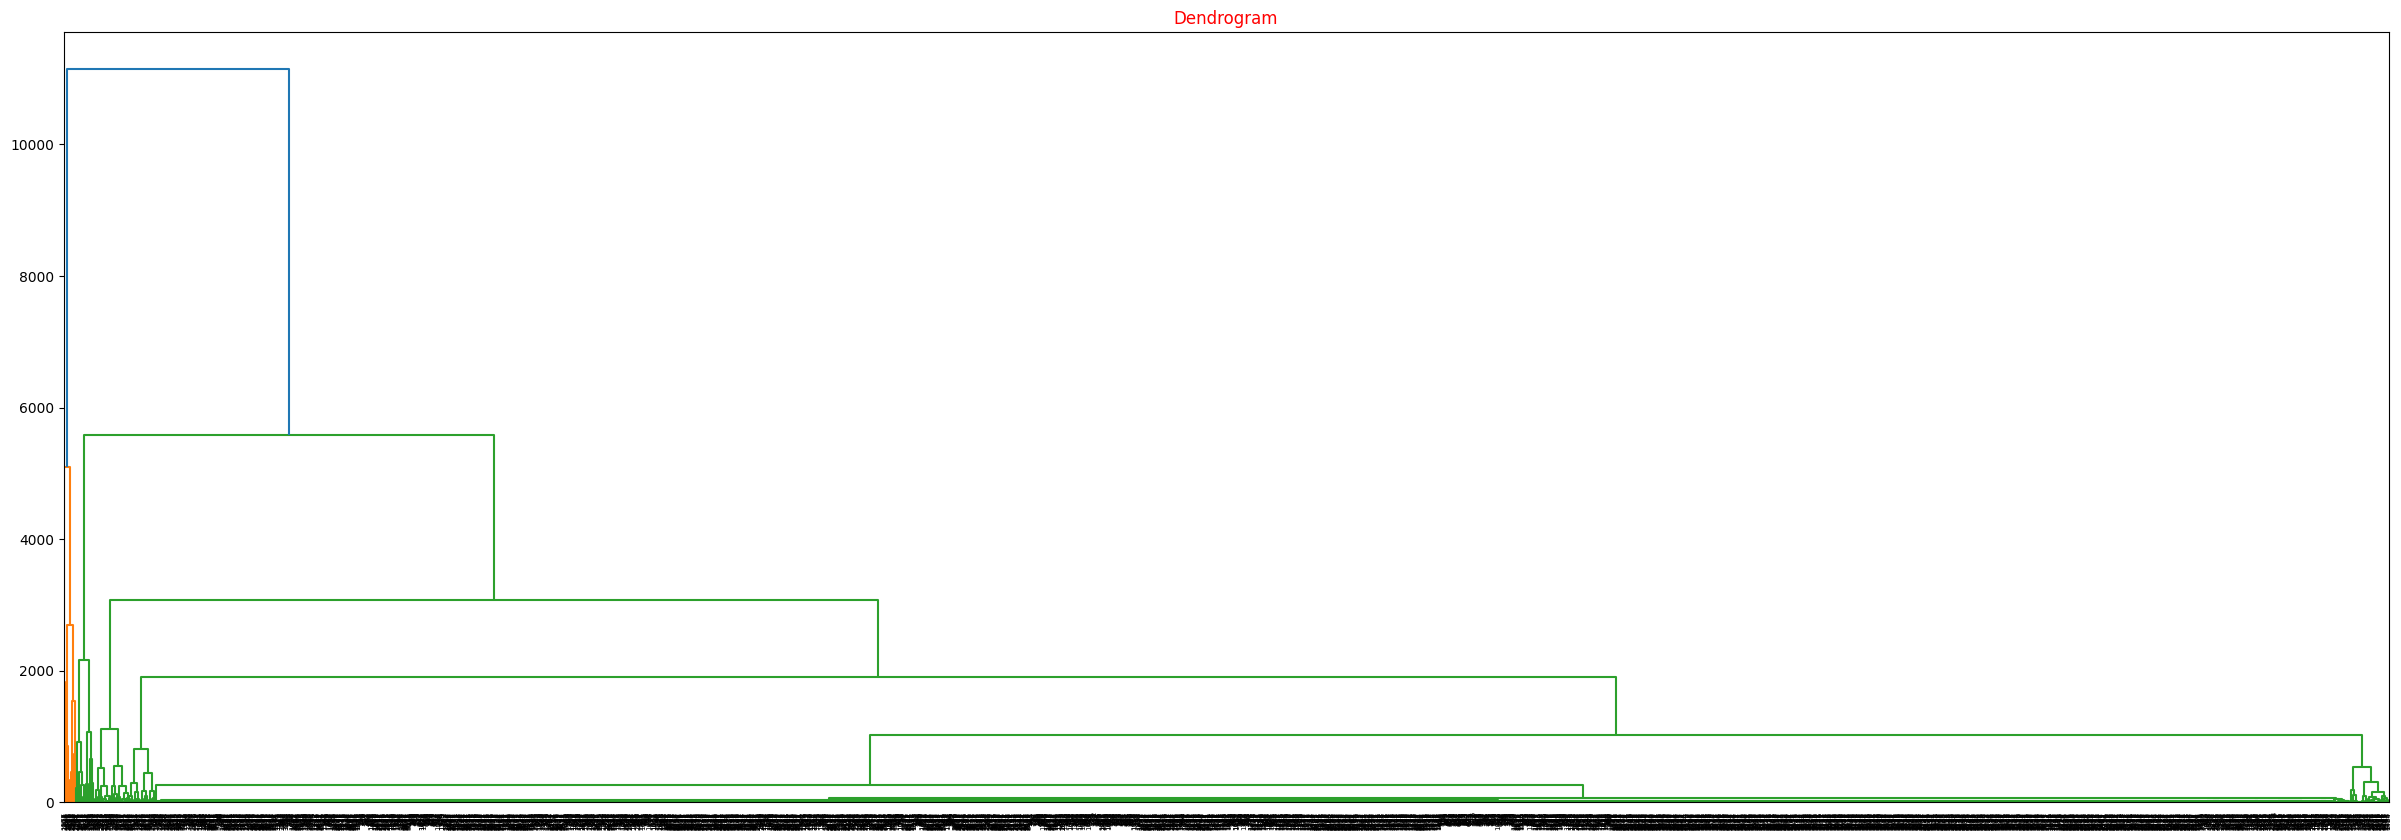

In [13]:
#Dendrogram
plt.rcParams['figure.figsize'] = (30, 10)
Dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='complete'))
plt.title("Dendrogram",c='r')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/pytho

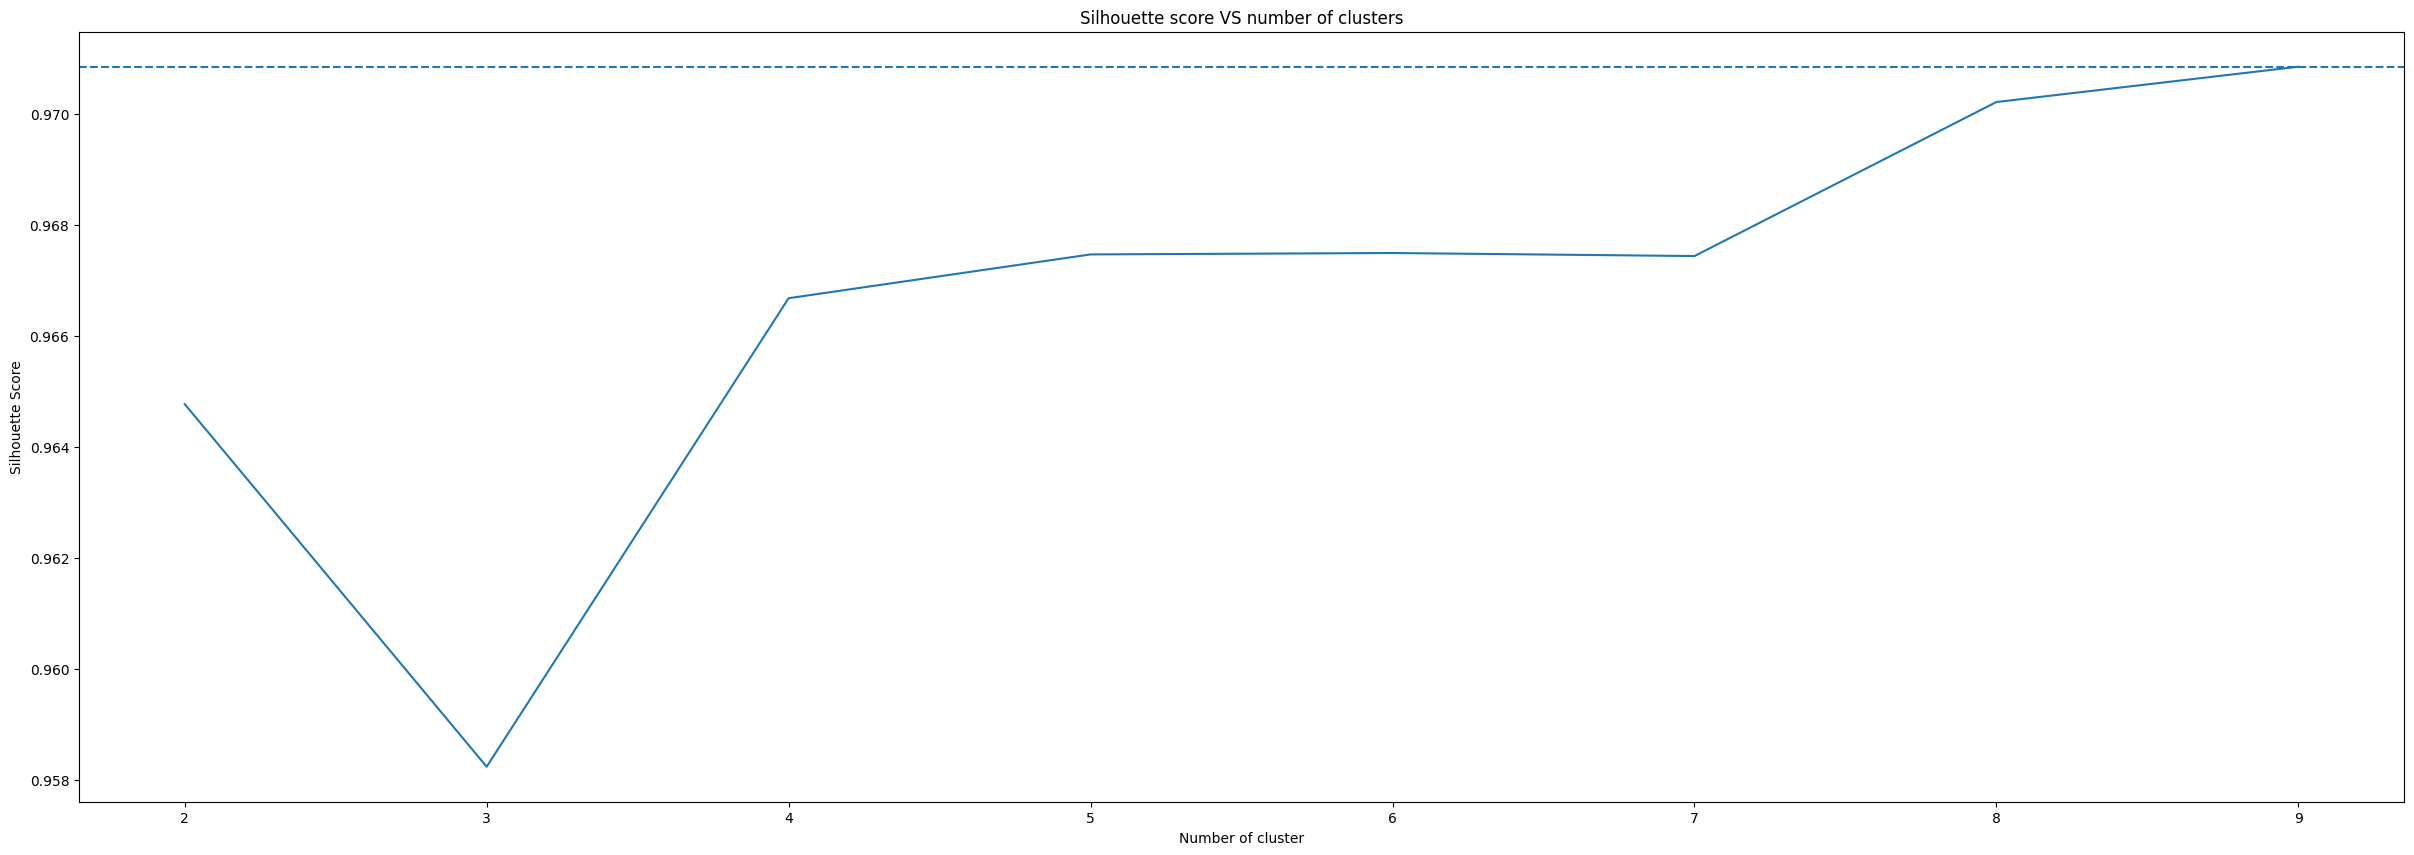

In [14]:
#Finding number of clusters for Best Silhouette score
score=[]
for i in range(2,10):
    Agglomerative=AgglomerativeClustering(n_clusters=i,affinity="euclidean")
    model=Agglomerative.fit(scaled_data)
    score.append(silhouette_score(scaled_data,model.labels_))

plt.plot(range(2,10),score)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score VS number of clusters")
plt.axhline(y=max(score),linestyle='--')

In [15]:
Agglomerative=AgglomerativeClustering(n_clusters=9,affinity='euclidean')
Heirarchical_clusters=Agglomerative.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [16]:
#Silhouette Score
print("Silhouette Score:",silhouette_score(scaled_data,Heirarchical_clusters))

Silhouette Score: 0.9708520803460606


In [17]:
Data['Hierarchical_cluster']=Heirarchical_clusters
Data['Hierarchical_cluster'].unique()

array([5, 1, 3, 8, 7, 0, 6, 4, 2])

In [18]:
#plotting graph for ID vs Hierarchical_ID
fig1=px.scatter(Data,x='Hierarchical_cluster',y='ID#')
fig1.update_layout(title="Hierarchical_cluster V/S Passenger_ID")
fig1.show()

In [19]:
Data.groupby(Data['Hierarchical_cluster']).mean().iloc[:,1:12]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hierarchical_cluster,,,,,,,,,,,
0,155707.818182,7674.272727,1.909091,1.000000,1.000000,16413.000000,12.727273,1304.636364,3.727273,4872.636364,0.727273
1,190012.810345,2483.500000,2.155172,1.000000,1.000000,23328.758621,14.482759,1535.155172,5.000000,4500.086207,0.689655
2,71610.250000,10161.250000,2.500000,1.000000,1.000000,11799.750000,15.750000,700.000000,2.250000,4904.500000,0.750000
3,120222.730769,854.923077,2.269231,1.025641,1.025641,26722.833333,17.384615,2167.948718,6.294872,4471.320513,0.653846
4,100975.100000,5906.000000,1.600000,1.000000,1.000000,15969.500000,8.100000,1009.000000,2.600000,3771.100000,0.400000
5,70038.123741,0.066243,2.051934,1.014838,1.012454,16728.415739,11.365660,384.838368,1.146794,4104.486486,0.354001
6,118103.357143,3738.642857,2.071429,1.000000,1.000000,21706.214286,12.571429,615.714286,2.285714,3724.357143,0.500000
7,97661.571429,1626.800000,2.228571,1.000000,1.000000,27331.857143,17.257143,2006.485714,5.857143,4329.485714,0.742857
8,101942.266667,4795.733333,2.400000,1.000000,1.000000,22920.733333,16.133333,1543.733333,4.733333,3694.533333,0.400000


K-Means Cluster

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

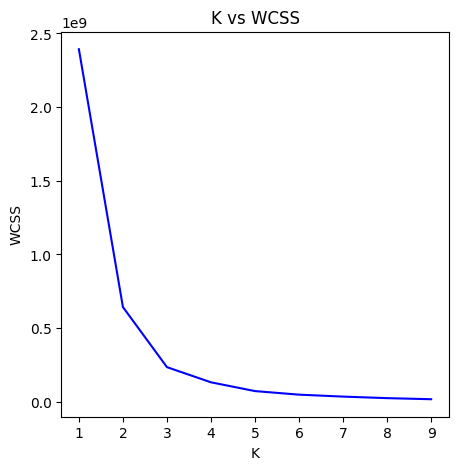

In [21]:
#Hyperparameter tuning for K in KMeans
WCSS=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    WCSS.append(kmeans.inertia_)
fig=plt.figure(figsize=(5,5))
plt.title('K vs WCSS')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.plot(range(1,10),WCSS,c='b')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

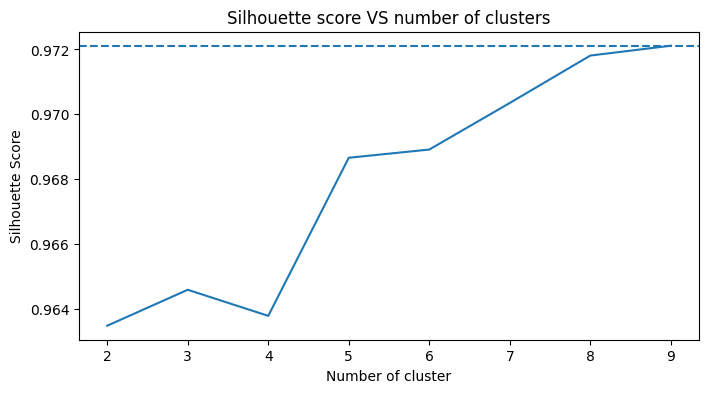

In [22]:
#Finding number of clusters for Best Silhouette score
score1=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    score1.append(silhouette_score(scaled_data,kmeans.labels_))
fig=plt.figure(figsize=(8,4))
plt.plot(range(2,10),score1)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score VS number of clusters")
plt.axhline(y=max(score1),linestyle='--')

In [23]:
Kmeans=KMeans(n_clusters=3,random_state=42)
Kmeans.fit(scaled_data)
Kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
Data['Kmeans_Clusters']=Kmeans.labels_

In [25]:
#Silhouette Score
print("Silhouette Score:",silhouette_score(scaled_data,Kmeans.labels_))

Silhouette Score: 0.9645825157507459


In [26]:
#Plotting the cluster data
fig2=px.scatter(Data,x='Kmeans_Clusters',y='ID#')
fig2.update_layout(title='Kmeans Cluster V/s Passenger ID')
fig2.show()

In [27]:
Data.groupby(Data['Kmeans_Clusters']).mean().iloc[:,1:12]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Kmeans_Clusters,,,,,,,,,,,
0,71016.270460,16.429202,2.056118,1.015069,1.012731,16933.983632,11.482723,420.155885,1.249156,4110.990647,0.359834
1,114248.263158,6510.421053,2.052632,1.000000,1.000000,18526.736842,12.631579,1070.973684,3.105263,4135.500000,0.500000
2,148648.660714,2372.160714,2.178571,1.000000,1.000000,23922.508929,15.348214,1623.982143,5.062500,4372.919643,0.687500


DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Hyper parameter tuning for DB SCAN
eps=np.linspace(0.1,5,10)
min_samp=range(5,25)
sil=[]
for i in eps:
    for j in min_samp:
        Dbscan=DBSCAN(eps=i,min_samples=j).fit(scaled_data)
        labels=Dbscan.labels_
        if len(set(labels))>1:
            sil.append([i,j,silhouette_score(scaled_data,labels)])

In [30]:
dataframe=pd.DataFrame(sil,columns=['eps','min_samp','silhouette_score']).sort_values(
    ['silhouette_score'],ascending=False)
dataframe

,eps,min_samp,silhouette_score
188,5.0,13,0.918132
189,5.0,14,0.917615
190,5.0,15,0.915557
196,5.0,21,0.915557
195,5.0,20,0.915557
...,...,...,...
15,0.1,20,-0.835983
16,0.1,21,-0.849682
17,0.1,22,-0.856801
18,0.1,23,-0.860924


In [31]:
def Dbscan(scaled_data,eps,min_samp):
    db=DBSCAN(eps=eps,min_samples=min_samp,metric='euclidean')
    db.fit(scaled_data)
    y=db.fit_predict(scaled_data)
    Data['Dbscan_labels']=y
    fig3=px.scatter(Data,x='Dbscan_labels',y='ID#')
    fig3.update_layout(title='DBscan Cluster')
    print("Silhouette Score:",silhouette_score(scaled_data,db.labels_))
    fig3.show()

In [32]:
Dbscan(scaled_data,5,13)

Silhouette Score: 0.9181317292657816


In [33]:
#percentage of outliers in DBscan represented as -1 in cluster ID
(len(Data[Data['Dbscan_labels']==-1])/len(Data))*100

6.826706676669167

In [34]:
Data.groupby(Data['Dbscan_labels']).mean().iloc[:,1:12]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Dbscan_labels,,,,,,,,,,,
-1,153544.501832,2111.040293,2.238095,1.007326,1.007326,28673.080586,18.175824,2635.677656,7.619048,4442.578755,0.673993
0,67743.977456,0.000000,2.046430,1.015030,1.012614,16300.184917,11.120236,300.650295,0.915996,4094.818841,0.348094


In [35]:
Data.iloc[:,12:]

,Hierarchical_cluster,Kmeans_Clusters,Dbscan_labels
0,5,0,0
1,5,0,0
2,5,0,0
3,5,0,0
4,5,0,0
...,...,...,...
3994,5,0,0
3995,5,0,0
3996,5,0,0
3997,5,0,0


In [36]:
Data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_cluster,Kmeans_Clusters,Dbscan_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,5,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,5,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,5,0,0
